<center><h1>2023AIWIN——中文网页自动导航挑战赛</h1></center>

## 赛事背景
RPA（Robotic Process Automation），即机器人流程自动化。通过模仿人的方式在电脑上执行一系列操作，可以实现人在电脑上的所有操作行为，如复制、粘贴、数据录入、网页导航、打开、关闭等，并且可以按照一定的规则持续不断地重复操作。

在具体的操作层面上，可以打开邮件、下载附件、登录网站和系统、读取数据库、移动文件和文件夹、复制粘贴、写入表格数据、网页数据抓取、文档数据抓取、连接系统API等。

传统的网页流程自动导航任务，通过熟练的业务人员配置低代码工具提供的原子能力，完成一整套规则化流程。该方案只能解决某一单一网页下具有固定操作步骤的流程，当网页发生变化或任务发生变化时，已有配置流程无法使用，需要重新配置新的流程。随着业务需求的增加，不仅需要有专业背景的人员维护，同时，流程繁琐的配置方式问题也凸显。针对上述问题，一种可迁移至相同场景不同流程的自动化导航技术亟待研究。

## 赛事任务
网页自动导航任务：根据用户输入的自然语言指令，在网页中规划（输出）一条动作序列，自动化完成指令中包含的用户意图

根据指令意图与网页（网页中可能包含公告、提示等异常弹窗）功能的不同，分有不同的任务，常见的任务包括：检索、下载、收藏 、评论等。本赛题仅涉及信息检索任务，涉及的原子操作包括：输入框、下拉框、单选框、复选框、日期选择、导航树 、按钮。根据原子操作的数量与难度，可将任务指令按如下难度划分：

- 单原子指令：只包含1个原子操作的自然语言指令
- 多原子指令：包含2个及以上原子操作的自然语言指令
    - 其中，大于等于5个原子操作的自然语言指令属于长程规划指令
    - 其中，少于5个原子操作的自然语言指令属于短程规划指令

本次赛题为探索多场景下指令检索任务，主要考察多场景指令任务迁移能力，操作序列不得使用规则或标注生成，比赛提交结果的模型为端到端模型或pipeline级联模型，不对模型集成方案进行考察。

## 赛题数据

### 数据来源说明

1. 数据领域：
    - 金融、法律、医疗、教育、交通等领域网页数据，包含：巨潮资讯、中国人民银行、上交所、中国证券投资基金业协会、中国银行保险监督管理委员会、裁判文书网、中国法律服务网、卫健委信用信息网（医生信息查询、护士信息查询）、学信网、交通安全综合服务管理平台、企查查、国家企业信用信息公示系统、国家统计局，共14个网页
    - 电商领域（购票、订餐、购物、出行等）网页数据，包含：猫眼电影、qq音乐、顺丰快递（查运费时效、查收寄标准）、火车票12306、安居客
2. 每个领域收集6～15个不同页面，两个领域共包含20个网页 ，A榜每个网页提供150条不同的指令（指令涵盖不同的任务），包含训练集与测试集，其中，每个网页包含训练集120条，测试集30条；B榜每个网页提供50条不同的指令，仅包含测试集
3. 基本动作集包含：点击（click）、输入（type）
4. 专家演示：赛事组提供一个网页“巨潮资讯”的数据作为示例，并给出采集专家演示数据的工具使用说明，选手可根据需要自行创建额外的专家演示数据（具体见2.b节的说明）
5. 允许参赛者使用公开的预训练模型和公开、自建数据的训练集，但需要提交明确的清单（具体参见第五节中关于解题文档PPT的说明）

### 数据内容说明


- 训练集: 20个仿真网页，覆盖金融、法律、医疗、教育、交通、电商类（购票、订餐、购物、出行等）等多个领域，每个网页包含120条指令，共2400条指令
- 测试集: 1600条自然语言指令数据，具体包含共20个网页，每个网页包含80条指令，分A/B榜，A榜30条，B榜50条（指令总量为A榜600+B榜1000）

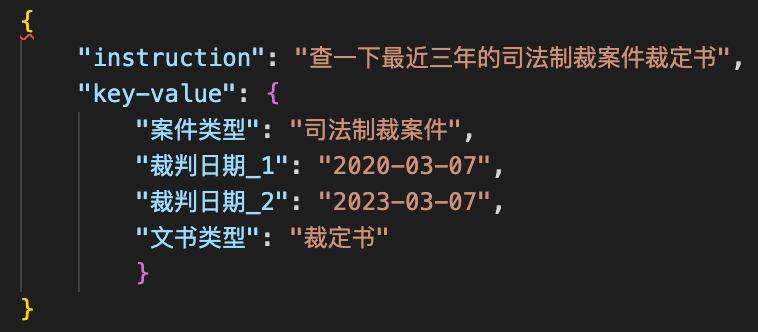

-   "instruction"为自然语言指令
-   "key-value"为槽位指令，key为操作节点的文本描述、value为操作值
-   指令中存在类似“几年之内”“最近几个月”等表述，统一认为结束日期是2023年3月15日。如“最近一年”表示“2022年3月15日到2023年3月15日”。

注：如果网页中两个节点对应同一个描述key时，其中一个描述为“key_1”，另一个描述为“key_2”。例如上图网页中与“裁判日期”相对应的有两个输入框，两个框的描述分别为“裁判日期_1”和“裁判日期_2”。



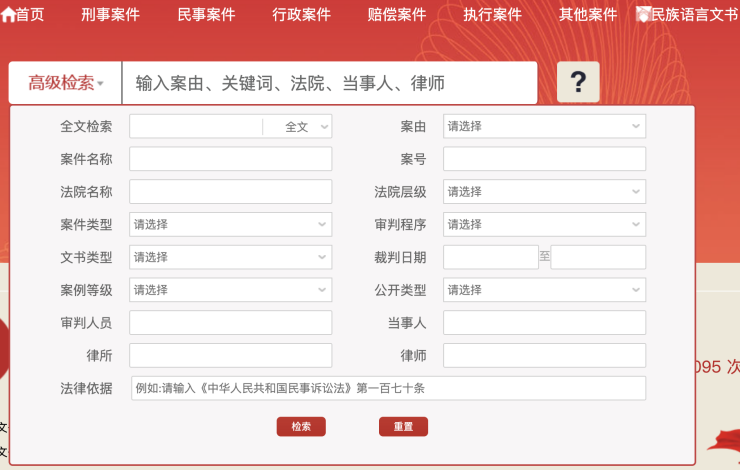

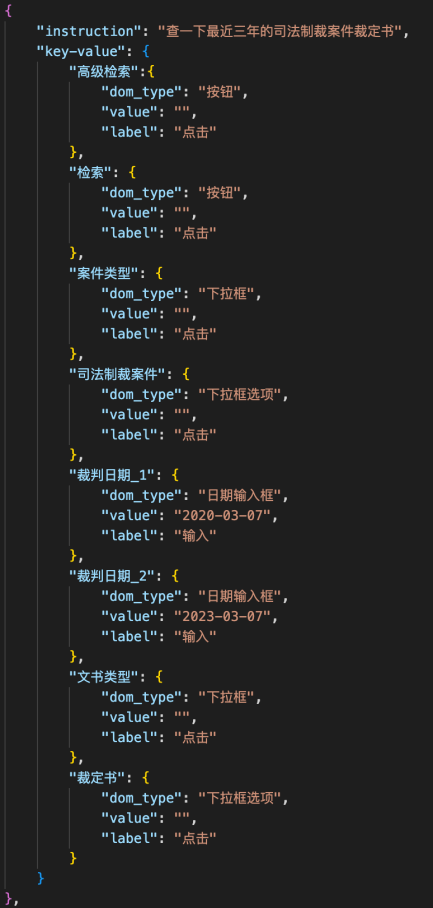

"instruction"为任务指令的自然语言形式，"key-value"为任务指令的槽位形式，key为操作节点的文本描述，dom_type为操作节点类别（DOM元素类别见“奖励函数（可选）”一节说明），value为操作值，action为动作。

## 评价指标

本次比赛以测试集中所有指令的成功率(successful rate, SR)作为评价指标。

AIWIN平台(ailab.aiwin.org.cn)要求所有提交内容统一打包为zip文件上传（请参见「参赛提交」tab下「下载」板块提供的提交样例），其内包含：模型输入测试集后输出的结果文件，文件格式统一为json，名称必须统一为submission.json，

## 数据分析

In [4]:
import json
import pandas as pd
from collections import defaultdict, Counter

# 读取数据集
LABEL_PATH = './2023S-T1-A-Data[供选手]/指令数据&标签/'
label_trainset = json.load(open(LABEL_PATH + 'label_trainset.json'))
instruction_trainset = json.load(open(LABEL_PATH + 'instruction_trainset.json'))
instruction_testA = json.load(open(LABEL_PATH + 'instruction_testA.json'))

In [5]:
[x['page_source'] for x in label_trainset]

['qq音乐',
 '上交所',
 '中国人民银行',
 '中国法律服务网',
 '中国裁判文书网',
 '中国证券投资基金业协会',
 '中国银行保险监督管理委员会',
 '交通安全综合服务管理平台',
 '企查查企业查询',
 '卫健委信用信息网_医',
 '卫健委信用信息网_护',
 '国家企业信用信息公示系统',
 '国家统计局',
 '学信网',
 '安居客',
 '巨潮资讯',
 '火车票12306',
 '猫眼电影',
 '顺丰快递查收寄标准',
 '顺丰快递查运费时效']

In [16]:
instruction_trainset[1]['instruction_detail'][:3]

[{'instruction': '检索一下科创板的信息', 'key-value': {'板块': '科创板'}},
 {'instruction': '请查一下主板B股的信息', 'key-value': {'板块': '主板B股'}},
 {'instruction': '请搜索中国国贸的信息', 'key-value': {'证券代码或简称': '中国国贸'}}]

In [17]:
label_trainset[1]['instruction_detail'][:10]

[{'instruction': '检索一下科创板的信息',
  'key-value': {'查询': {'dom_type': '按钮', 'value': '', 'action': '点击'},
   '板块': {'dom_type': '下拉框', 'value': '', 'action': '点击'},
   '科创板': {'dom_type': '下拉框选项', 'value': '', 'action': '点击'}}},
 {'instruction': '请查一下主板B股的信息',
  'key-value': {'查询': {'dom_type': '按钮', 'value': '', 'action': '点击'},
   '板块': {'dom_type': '下拉框', 'value': '', 'action': '点击'},
   '主板B股': {'dom_type': '下拉框选项', 'value': '', 'action': '点击'}}},
 {'instruction': '请搜索中国国贸的信息',
  'key-value': {'查询': {'dom_type': '按钮', 'value': '', 'action': '点击'},
   '证券代码或简称': {'dom_type': '输入框', 'value': '中国国贸', 'action': '输入'}}},
 {'instruction': '查找主板A股的信息',
  'key-value': {'查询': {'dom_type': '按钮', 'value': '', 'action': '点击'},
   '板块': {'dom_type': '下拉框', 'value': '', 'action': '点击'},
   '主板A股': {'dom_type': '下拉框选项', 'value': '', 'action': '点击'}}},
 {'instruction': '请查一下浦发银行的信息',
  'key-value': {'查询': {'dom_type': '按钮', 'value': '', 'action': '点击'},
   '证券代码或简称': {'dom_type': '输入框', 'value': '浦发银行

## 思路1：网页关键词抽取

In [21]:
import json
import pandas as pd
import re
from collections import defaultdict, Counter
from bs4 import BeautifulSoup

# 读取数据集
LABEL_PATH = './2023S-T1-A-Data[供选手]/指令数据&标签/'
label_trainset = json.load(open(LABEL_PATH + 'label_trainset.json'))
instruction_trainset = json.load(open(LABEL_PATH + 'instruction_trainset.json'))
instruction_testA = json.load(open(LABEL_PATH + 'instruction_testA.json'))

In [22]:
# 本地模拟网页的地址
WEB_PATH = './2023S-T1-A-Data[供选手]/仿真页面/'
WEB_INDEX_FILE = {
    'qq音乐': WEB_PATH + 'qq音乐/查询.html',
    '上交所': WEB_PATH + '上交所/assortment/stock/list/share/nosearch.html',
    '中国人民银行': WEB_PATH + '中国人民银行/search/pcRender.html',
    '学信网': WEB_PATH + '学信网/zsml/justSearch.html',
    '安居客': WEB_PATH + '2-9安居客/shanghai.anjuke.com/sale/justSearch.html'
}

In [23]:
submit_prediction = []
for idx in range(len(label_trainset)):
    golden_key_value = {}
    golden_start_tag_freq = defaultdict(int)
    page_source = instruction_trainset[idx]['page_source']
    
    default_key = list(label_trainset[idx]['instruction_detail'][0]['key-value'].keys())[0]
    default_value = label_trainset[idx]['instruction_detail'][0]['key-value'][default_key]
    
    # 如果有模拟网页的地址，读取网页的内容，得到匹配正则
    if page_source in WEB_INDEX_FILE:
        web_data = BeautifulSoup(''.join(open(WEB_INDEX_FILE[page_source]).readlines()))
        web_keywords = [x.text.strip() for x in web_data.find_all('a')]
        web_keywords = [x for x in web_keywords if x not in ['全部']]
        web_regex = '(' + '|'.join(web_keywords) + ')'
    
    # 对测试集结果进行匹配
    page_predictions = []
    for instruction in instruction_testA[idx]['instruction_detail']:
        
        # 默认搜索按钮行为
        instruction_result = {'instruction': instruction['instruction']}
        instruction_result['key-value'] = {
            default_key: default_value
        }
        
        if page_source in WEB_INDEX_FILE:
            for keyword in re.findall(web_regex, instruction['instruction']):
                if len(keyword) == 0:
                    continue
                instruction_result['key-value'][keyword] = {'dom_type': '单选框', 'value': '', 'action': '点击'}

        page_predictions.append(instruction_result)
    
    submit_prediction.append({
        'page_source': page_source,
        'instruction_detail': page_predictions
    })
    
with open('submission.json', 'w') as up:
    json.dump(submit_prediction, up)

In [84]:
!zip submission.json.zip submission.json

  adding: submission.json (deflated 92%)


## 思路2：GLM模拟关键词抽取

In [6]:
import random

chat_data = []
for idx in range(20):
    for instructions in instruction_trainset[idx]['instruction_detail']:
        chat_data.append({
            'prompt': instructions['instruction'],
            'response': ';'.join([f'{key}' for key, value in instructions['key-value'].items()]),
            "history": []
        })
random.shuffle(chat_data)

In [14]:
import numpy as np
np.max([len(x['response']) for x in chat_data])

71

In [7]:
with open('train.json', 'w') as up:
    for line in chat_data[:-400]:
        up.write(json.dumps(line)+'\n')
    
with open('dev.json', 'w') as up:
    for line in chat_data[-400:]:
        up.write(json.dumps(line)+'\n')

In [8]:
line

{'prompt': '请检索无动产抵押登记的企业信息', 'response': '无动产抵押登记信息', 'history': []}

In [56]:
instruction_trainset[10]['instruction_detail'][10]

{'instruction': '请搜索上海豫园地段医院的护士信息', 'key-value': {'执业地点': '上海豫园地段医院'}}

In [55]:
label_trainset[10]['instruction_detail'][10]

{'instruction': '请搜索上海豫园地段医院的护士信息',
 'key-value': {'查询': {'dom_type': '按钮', 'value': '', 'action': '点击'},
  '执业地点': {'dom_type': '输入框', 'value': '上海豫园地段医院', 'action': '输入'}}}

训练细节

https://github.com/THUDM/ChatGLM-6B/blob/main/ptuning/README.md

In [1]:
import torch
from transformers import AutoTokenizer, AutoModel, AutoConfig

config = AutoConfig.from_pretrained("THUDM/chatglm-6b", trust_remote_code=True)
config.pre_seq_len = 8

tokenizer = AutoTokenizer.from_pretrained("THUDM/chatglm-6b", trust_remote_code=True)
model = AutoModel.from_pretrained("THUDM/chatglm-6b", trust_remote_code=True, config=config).half()
prefix_state_dict = torch.load('./ChatGLM-6B/ptuning/checkpoint-100/pytorch_model.bin')
new_prefix_state_dict = {}
for k, v in prefix_state_dict.items():
    if k.startswith("transformer.prefix_encoder."):
        new_prefix_state_dict[k[len("transformer.prefix_encoder."):]] = v
model.transformer.prefix_encoder.load_state_dict(new_prefix_state_dict)

model = model.quantize(4)
model = model.half().cuda()
model.transformer.prefix_encoder.float()
model = model.eval()

response, history = model.chat(tokenizer, "你好", history=[])
print(response)
response, history = model.chat(tokenizer, "晚上睡不着应该怎么办", history=history)
print(response)

Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
Symbol nvrtcGetCUBIN not found in /usr/local/cuda/lib64/libnvrtc.so
Symbol nvrtcGetCUBINSize not found in /usr/local/cuda/lib64/libnvrtc.so


Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

Some weights of ChatGLMForConditionalGeneration were not initialized from the model checkpoint at THUDM/chatglm-6b and are newly initialized: ['transformer.prefix_encoder.embedding.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The dtype of attention mask (torch.int64) is not bool


你好；
;


In [3]:
response, history = model.chat(tokenizer, '''请搜索：吉林批发和零售业的主板B股的首创环保的信息。''', history=[])
print(response)

主板B股；吉林批发和零售业；首创环保
